# Linear Regression Primer

This is a practical linear regression reference primer. 

## Sections
1. The Core Workflow - Start here with clean data
2. Understanding What's Happening - Math made simple
3. Handling Real Data - Cleaning step by step
4. Preprocessing Pipeline - Scaling and transforming
5. Feature Engineering - Creating better features
6. Improving the Model - Regularization techniques
7. Model Selection - Choosing the best approach
8. Production Pipeline - Putting it all together

## 1. The Core Workflow

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate clean, simple data - house size predicts price
np.random.seed(42)
X = np.random.randn(100, 1) * 500 + 2000  # House size (1000-3000 sq ft)
y = 100 * X.flatten() + 50000 + np.random.randn(100) * 10000  # Price

print("Data shape:", X.shape)
print("Target shape:", y.shape)
print("Data preview:")
print("X (sq ft):", X[:5].flatten().astype(int))
print("y (price):", y[:5].astype(int))

Data shape: (100, 1)
Target shape: (100,)
Data preview:
X (sq ft): [2248 1930 2323 2761 1882]
y (price): [260682 238880 278957 318128 236679]


### Step 1: Split the data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 80 samples
Test set: 20 samples


### Step 2: Train the model (fit)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model trained!")
print(f"Slope (coefficient): ${model.coef_[0]:.2f} per sq ft")
print(f"Intercept: ${model.intercept_:.2f}")
print(f"Learned equation: price = {model.coef_[0]:.2f} × sq_ft + {model.intercept_:.2f}")

Model trained!
Slope (coefficient): $97.17 per sq ft
Intercept: $55805.50
Learned equation: price = 97.17 × sq_ft + 55805.50


### Step 3: Make predictions (predict)

In [56]:
y_pred = model.predict(X_test)

print("Predictions vs Actual (first 5):")
for i in range(5):
    print(f"Predicted: ${y_pred[i]:.0f}, Actual: ${y_test[i]:.0f}, Difference: ${abs(y_pred[i] - y_test[i]):.0f}")

Predictions vs Actual (first 5):
Predicted: $224966, Actual: $228911, Difference: $3946
Predicted: $279864, Actual: $282906, Difference: $3042
Predicted: $267704, Actual: $259175, Difference: $8530
Predicted: $215172, Actual: $221826, Difference: $6654
Predicted: $178312, Actual: $178673, Difference: $361


### Step 4: Evaluate the model

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: ${mse:.0f}")
print(f"Root Mean Squared Error: ${np.sqrt(mse):.0f}")
print(f"R² Score: {r2:.3f} ({r2*100:.1f}% of variance explained)")


Model Performance:
Mean Squared Error: $87284861
Root Mean Squared Error: $9343
R² Score: 0.943 (94.3% of variance explained)


### Visualize the results

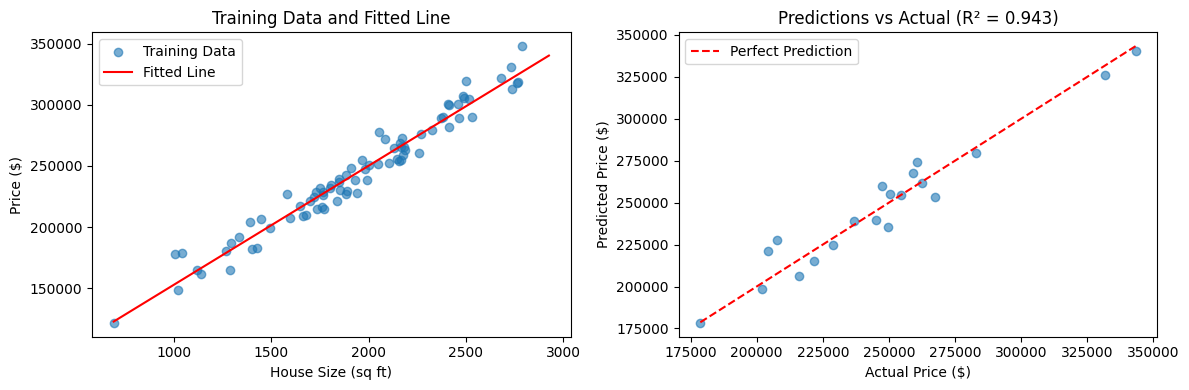

In [58]:
plt.figure(figsize=(12, 4))

# Training data and line
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data')
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, 'r-', label='Fitted Line')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('Training Data and Fitted Line')
plt.legend()

# Predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Predictions vs Actual (R² = {r2:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

**Key Takeaway:** Machine learning is essentially: fit() → predict() → evaluate(). Everything else supports these three core steps.

## 2. Understanding What's Happening

### The Math Made Simple
Linear regression finds the best line: `y = mx + b`

- m (slope/coefficient): How much y changes when x increases by 1
- b (intercept): Value of y when x is 0

In [59]:
# What the model learned vs what we used to generate data
print("What we used to generate data: price = 100 × sq_ft + 50000")
print(f"What the model learned: price = {model.coef_[0]:.2f} × sq_ft + {model.intercept_:.2f}")
print(f"Difference in slope: {abs(model.coef_[0] - 100):.2f}")
print(f"Difference in intercept: ${abs(model.intercept_ - 50000):.0f}")

What we used to generate data: price = 100 × sq_ft + 50000
What the model learned: price = 97.17 × sq_ft + 55805.50
Difference in slope: 2.83
Difference in intercept: $5806


### Multiple Features

In [60]:
# Generate data with multiple features - house characteristics
np.random.seed(42)
n_samples = 200
house_data = {
    'size': np.random.uniform(1000, 3000, n_samples),
    'bedrooms': np.random.randint(1, 6, n_samples), 
    'age': np.random.uniform(0, 50, n_samples)
}

# True relationship: price = 100*size + 5000*bedrooms - 500*age + base_price + noise
X_multi = np.column_stack([house_data['size'], house_data['bedrooms'], house_data['age']])
y_multi = (100 * house_data['size'] + 
           5000 * house_data['bedrooms'] - 
           500 * house_data['age'] + 
           50000 + np.random.normal(0, 10000, n_samples))

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

print(f"Multiple features model:")
print(f"True coefficients: [100, 5000, -500]")
print(f"Learned coefficients: [{model_multi.coef_[0]:.0f}, {model_multi.coef_[1]:.0f}, {model_multi.coef_[2]:.0f}]")
print(f"R² Score: {r2_score(y_test_m, y_pred_m):.3f}")

feature_names = ['Size (sq ft)', 'Bedrooms', 'Age (years)']
for i, (name, coef) in enumerate(zip(feature_names, model_multi.coef_)):
    print(f"{name}: ${coef:.0f} change in price per unit increase")

Multiple features model:
True coefficients: [100, 5000, -500]
Learned coefficients: [98, 5245, -567]
R² Score: 0.980
Size (sq ft): $98 change in price per unit increase
Bedrooms: $5245 change in price per unit increase
Age (years): $-567 change in price per unit increase


**Key Takeaway:** With multiple features, each coefficient tells us how much the target changes when that specific feature increases by 1 (holding others constant).

## 3. Handling Real Data

In [61]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load a real dataset
diabetes = load_diabetes()
X_real, y_real = diabetes.data, diabetes.target

print(f"Real dataset shape: {X_real.shape}")
print(f"Feature names: {diabetes.feature_names}")
print(f"Target (diabetes progression): min={y_real.min():.1f}, max={y_real.max():.1f}")

Real dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (diabetes progression): min=25.0, max=346.0


### Step 1: Explore the data

In [62]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(X_real, columns=diabetes.feature_names)
df['target'] = y_real

print("First few rows:")
print(df.head())

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nBasic statistics:")
print(df.describe())

First few rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Missing values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Basic statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  

### Step 2: Try the model on raw data

In [63]:
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

model_raw = LinearRegression()
model_raw.fit(X_train_real, y_train_real)
y_pred_raw = model_raw.predict(X_test_real)

raw_r2 = r2_score(y_test_real, y_pred_raw)
raw_mse = mean_squared_error(y_test_real, y_pred_raw)

print(f"Model on raw data:")
print(f"R² Score: {raw_r2:.3f}")
print(f"MSE: {raw_mse:.1f}")

Model on raw data:
R² Score: 0.453
MSE: 2900.2


### Step 3: Create data with real problems

In [64]:
from sklearn.impute import SimpleImputer

# Simulate missing values and outliers on a fresh copy
X_messy = X_real.copy()
y_messy = y_real.copy()

# Add missing values (10% of data)
np.random.seed(123)  # Different seed for different missing pattern
missing_mask = np.random.random(X_messy.shape) < 0.1
X_messy[missing_mask] = np.nan

# Add outliers (5% of targets)
outlier_indices = np.random.choice(len(y_messy), size=int(0.05 * len(y_messy)), replace=False)
y_messy[outlier_indices] = y_messy[outlier_indices] + np.random.choice([-300, 300], len(outlier_indices))

print(f"Created messy data:")
print(f"Missing values: {np.isnan(X_messy).sum()} ({np.isnan(X_messy).mean()*100:.1f}%)")
print(f"Outliers added: {len(outlier_indices)}")
print(f"Original target range: {y_real.min():.0f} to {y_real.max():.0f}")
print(f"Messy target range: {y_messy.min():.0f} to {y_messy.max():.0f}")

Created messy data:
Missing values: 462 (10.5%)
Outliers added: 22
Original target range: 25 to 346
Messy target range: -269 to 520


### Step 4: Clean the data

In [65]:
# Handle missing values
imputer = SimpleImputer(strategy='median')  # Median is robust to outliers
X_imputed = imputer.fit_transform(X_messy)

# Handle outliers using IQR method
Q1 = np.percentile(y_messy, 25)
Q3 = np.percentile(y_messy, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outliers
outlier_mask = (y_messy >= lower_bound) & (y_messy <= upper_bound)
X_cleaned = X_imputed[outlier_mask]
y_cleaned = y_messy[outlier_mask]

print(f"After cleaning:")
print(f"Samples removed due to outliers: {len(y_messy) - len(y_cleaned)}")
print(f"Remaining samples: {len(y_cleaned)}")
print(f"Clean target range: {y_cleaned.min():.0f} to {y_cleaned.max():.0f}")

After cleaning:
Samples removed due to outliers: 12
Remaining samples: 430
Clean target range: -43 to 404


### Step 5: Compare before and after cleaning

In [66]:
# Train on messy data (remove NaN rows first)
clean_rows = ~np.isnan(X_messy).any(axis=1)
X_messy_clean = X_messy[clean_rows]
y_messy_clean = y_messy[clean_rows]

X_train_messy, X_test_messy, y_train_messy, y_test_messy = train_test_split(
    X_messy_clean, y_messy_clean, test_size=0.2, random_state=42)

model_messy = LinearRegression()
model_messy.fit(X_train_messy, y_train_messy)
y_pred_messy = model_messy.predict(X_test_messy)

# Train on cleaned data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_clean)

messy_r2 = r2_score(y_test_messy, y_pred_messy)
clean_r2 = r2_score(y_test_clean, y_pred_clean)

print(f"Results comparison:")
print(f"Raw data R²: {raw_r2:.3f}")
print(f"Messy data R²: {messy_r2:.3f}")  
print(f"Clean data R²: {clean_r2:.3f}")
print(f"Improvement from cleaning: {clean_r2 - messy_r2:.3f}")

Results comparison:
Raw data R²: 0.453
Messy data R²: -0.059
Clean data R²: 0.321
Improvement from cleaning: 0.380


***Key Takeaway:*** Clean data leads to better models. Common cleaning steps: handle missing values (imputation), remove/cap outliers, fix data types.

## 4. Preprocessing Pipeline

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Create data with dramatically different scales to show the effect
np.random.seed(42)
X_scales = np.column_stack([
    np.random.randn(200) * 1,          # Feature 1: small values (-3 to 3)
    np.random.randn(200) * 100000,     # Feature 2: large values (-300k to 300k)  
    np.random.randn(200) * 0.001       # Feature 3: tiny values (-0.003 to 0.003)
])

# Create target where all features contribute equally in their original scale
y_scales = (X_scales[:,0] + 
            X_scales[:,1] * 0.00001 + 
            X_scales[:,2] * 1000 + 
            np.random.randn(200) * 0.1)

print("Data with different scales:")
print(f"Feature 1 range: {X_scales[:,0].min():.3f} to {X_scales[:,0].max():.3f}")
print(f"Feature 2 range: {X_scales[:,1].min():.0f} to {X_scales[:,1].max():.0f}")
print(f"Feature 3 range: {X_scales[:,2].min():.6f} to {X_scales[:,2].max():.6f}")

Data with different scales:
Feature 1 range: -2.620 to 2.720
Feature 2 range: -324127 to 385273
Feature 3 range: -0.002472 to 0.003079


### Without scaling

In [68]:
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_s, y_train_s)
y_pred_unscaled = model_unscaled.predict(X_test_s)
r2_unscaled = r2_score(y_test_s, y_pred_unscaled)

print(f"Without scaling:")
print(f"R² Score: {r2_unscaled:.3f}")
print(f"Coefficients: {model_unscaled.coef_}")
print(f"Note: Coefficients dominated by large-scale features")

Without scaling:
R² Score: 0.996
Coefficients: [9.85076725e-01 1.00204464e-03 1.00496726e+02]
Note: Coefficients dominated by large-scale features


### With StandardScaler (mean=0, std=1)

In [69]:
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_s)
X_test_std = scaler_std.transform(X_test_s)

model_std = LinearRegression()
model_std.fit(X_train_std, y_train_s)
y_pred_std = model_std.predict(X_test_std)
r2_std = r2_score(y_test_s, y_pred_std)

print(f"With StandardScaler:")
print(f"R² Score: {r2_std:.3f}")
print(f"Coefficients: {model_std.coef_}")
print(f"Note: All coefficients now comparable in magnitude")

With StandardScaler:
R² Score: 0.996
Coefficients: [0.90213496 1.01713331 1.03739799]
Note: All coefficients now comparable in magnitude


### With MinMaxScaler (range 0-1)

In [70]:
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train_s)
X_test_mm = scaler_mm.transform(X_test_s)

model_mm = LinearRegression()
model_mm.fit(X_train_mm, y_train_s)
y_pred_mm = model_mm.predict(X_test_mm)
r2_mm = r2_score(y_test_s, y_pred_mm)

print(f"With MinMaxScaler:")
print(f"R² Score: {r2_mm:.3f}")
print(f"Coefficients: {model_mm.coef_}")
print(f"Note: Features scaled to [0,1] range")

With MinMaxScaler:
R² Score: 0.996
Coefficients: [5.78173133 5.85610974 5.12322901]
Note: Features scaled to [0,1] range


### With RobustScaler (median and IQR based)

In [71]:
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train_s)
X_test_robust = scaler_robust.transform(X_test_s)

model_robust = LinearRegression()
model_robust.fit(X_train_robust, y_train_s)
y_pred_robust = model_robust.predict(X_test_robust)
r2_robust = r2_score(y_test_s, y_pred_robust)

print(f"With RobustScaler:")
print(f"R² Score: {r2_robust:.3f}")
print(f"Coefficients: {model_robust.coef_}")
print(f"Note: Uses median and IQR, robust to outliers")

With RobustScaler:
R² Score: 0.996
Coefficients: [1.08636842 1.29919773 1.43390798]
Note: Uses median and IQR, robust to outliers


### Compare scaling methods

In [72]:
scalers_comparison = {
    'No Scaling': (r2_unscaled, model_unscaled.coef_),
    'StandardScaler': (r2_std, model_std.coef_),
    'MinMaxScaler': (r2_mm, model_mm.coef_),
    'RobustScaler': (r2_robust, model_robust.coef_)
}

print(f"Scaling method comparison:")
for name, (r2, coef) in scalers_comparison.items():
    print(f"{name:15}: R² = {r2:.3f}")

print(f"\nCoefficient interpretability:")
print(f"Unscaled:     {model_unscaled.coef_}")
print(f"StandardScaler: {model_std.coef_}")
print(f"Note: StandardScaler makes coefficients directly comparable")

Scaling method comparison:
No Scaling     : R² = 0.996
StandardScaler : R² = 0.996
MinMaxScaler   : R² = 0.996
RobustScaler   : R² = 0.996

Coefficient interpretability:
Unscaled:     [9.85076725e-01 1.00204464e-03 1.00496726e+02]
StandardScaler: [0.90213496 1.01713331 1.03739799]
Note: StandardScaler makes coefficients directly comparable


**Key Takeaway**:

- StandardScaler: Best for normally distributed features
- MinMaxScaler: Best when you need bounded ranges (0-1)
- RobustScaler: Best when you have outliers (uses median/IQR)

## 5. Feature Engineering

### Add polynomial features

In [73]:
from sklearn.preprocessing import PolynomialFeatures

# Start with simple non-linear data
np.random.seed(42)
X_basic = np.random.uniform(-2, 2, (300, 2))
# Create clear non-linear relationship
y_nonlinear = (2 * X_basic[:,0]**2 + 
               X_basic[:,0] * X_basic[:,1] + 
               1.5 * X_basic[:,1] + 
               np.random.randn(300) * 0.3)

X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_basic, y_nonlinear, test_size=0.2, random_state=42)

# Baseline: linear model on original features  
model_baseline = LinearRegression()
model_baseline.fit(X_train_nl, y_train_nl)
y_pred_baseline = model_baseline.predict(X_test_nl)
r2_baseline = r2_score(y_test_nl, y_pred_baseline)

# With polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_nl)
X_test_poly = poly_features.transform(X_test_nl)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_nl)
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test_nl, y_pred_poly)

print(f"Polynomial Feature Engineering:")
print(f"Original features: {X_train_nl.shape[1]}")
print(f"With polynomial features: {X_train_poly.shape[1]}")
print(f"Feature names: {poly_features.get_feature_names_out(['x1', 'x2'])}")
print(f"Baseline R²: {r2_baseline:.3f}")
print(f"Polynomial R²: {r2_poly:.3f}")
print(f"Improvement: {r2_poly - r2_baseline:.3f}")

Polynomial Feature Engineering:
Original features: 2
With polynomial features: 5
Feature names: ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']
Baseline R²: 0.123
Polynomial R²: 0.990
Improvement: 0.867


### Categorical Features and Interactions

In [74]:
# Create dataset with mixed feature types
np.random.seed(42)
n_samples = 1000

# Categorical features
neighborhoods = np.random.choice(['Downtown', 'Suburbs', 'Rural'], n_samples, p=[0.3, 0.5, 0.2])
house_types = np.random.choice(['Apartment', 'House', 'Condo'], n_samples, p=[0.4, 0.4, 0.2])

# Numerical features  
sizes = np.random.uniform(800, 3000, n_samples)
ages = np.random.uniform(0, 50, n_samples)

# Create realistic price with interactions
neighborhood_effect = {'Downtown': 50000, 'Suburbs': 20000, 'Rural': 0}
type_effect = {'House': 30000, 'Condo': 15000, 'Apartment': 0}

prices = (100 * sizes + 
          [neighborhood_effect[n] for n in neighborhoods] +
          [type_effect[t] for t in house_types] +
          # Interaction: downtown apartments are premium
          [25000 if (n == 'Downtown' and t == 'Apartment') else 0 
           for n, t in zip(neighborhoods, house_types)] -
          500 * ages +
          np.random.normal(0, 15000, n_samples))

# Create DataFrame
df_mixed = pd.DataFrame({
    'size': sizes,
    'age': ages,
    'neighborhood': neighborhoods,
    'house_type': house_types,
    'price': prices
})

print("Mixed feature types dataset:")
print(df_mixed.head())
print(f"\nDataset shape: {df_mixed.shape}")
print(f"Categorical value counts:")
print("Neighborhoods:", df_mixed['neighborhood'].value_counts().to_dict())
print("House types:", df_mixed['house_type'].value_counts().to_dict())

Mixed feature types dataset:
          size        age neighborhood house_type          price
0  1375.752504  33.635150      Suburbs  Apartment  160687.287990
1  1343.353358  39.834070        Rural      House  149116.067974
2  2793.760077  12.523395      Suburbs      Condo  299016.759422
3  1349.001640  31.243705      Suburbs      House  176116.874404
4  1398.289397  28.587299     Downtown      Condo  183648.935516

Dataset shape: (1000, 5)
Categorical value counts:
Neighborhoods: {'Suburbs': 482, 'Downtown': 319, 'Rural': 199}
House types: {'House': 411, 'Apartment': 385, 'Condo': 204}


### Handling Categorical Features

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Method 1: One-hot encoding (recommended for nominal categories)
df_encoded = pd.get_dummies(df_mixed, columns=['neighborhood', 'house_type'], prefix=['area', 'type'])

print("After one-hot encoding:")
print(f"New shape: {df_encoded.shape}")
print("New columns:", [col for col in df_encoded.columns if col not in ['size', 'age', 'price']])

# Prepare features and target
X_mixed = df_encoded.drop('price', axis=1)
y_mixed = df_encoded['price']

X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_split(
    X_mixed, y_mixed, test_size=0.2, random_state=42)

# Compare models
# 1. Numeric features only
X_numeric = df_mixed[['size', 'age']]
X_train_num, X_test_num, _, _ = train_test_split(X_numeric, y_mixed, test_size=0.2, random_state=42)

model_numeric = LinearRegression()
model_numeric.fit(X_train_num, y_train_mixed)
y_pred_numeric = model_numeric.predict(X_test_num)
r2_numeric = r2_score(y_test_mixed, y_pred_numeric)

# 2. With categorical features
model_categorical = LinearRegression()
model_categorical.fit(X_train_mixed, y_train_mixed)
y_pred_categorical = model_categorical.predict(X_test_mixed)
r2_categorical = r2_score(y_test_mixed, y_pred_categorical)

print(f"\nCategorical Feature Impact:")
print(f"Numeric only R²: {r2_numeric:.3f}")
print(f"With categorical R²: {r2_categorical:.3f}")
print(f"Improvement: {r2_categorical - r2_numeric:.3f}")

# Show feature importance
feature_importance = pd.DataFrame({
    'feature': X_mixed.columns,
    'coefficient': model_categorical.coef_,
    'abs_coefficient': np.abs(model_categorical.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(f"\nTop 5 Most Important Features:")
print(feature_importance.head())

After one-hot encoding:
New shape: (1000, 9)
New columns: ['area_Downtown', 'area_Rural', 'area_Suburbs', 'type_Apartment', 'type_Condo', 'type_House']

Categorical Feature Impact:
Numeric only R²: 0.820
With categorical R²: 0.951
Improvement: 0.131

Top 5 Most Important Features:
          feature   coefficient  abs_coefficient
2   area_Downtown  34067.943809     34067.943809
3      area_Rural -27220.468674     27220.468674
7      type_House  13165.958753     13165.958753
5  type_Apartment -10140.553421     10140.553421
4    area_Suburbs  -6847.475135      6847.475135


## 6. Improving the Model

In [85]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create challenging overfitting scenario: more features than samples
np.random.seed(42)
n_samples, n_features = 50, 100  # More features than samples!
X_overfit = np.random.randn(n_samples, n_features)
scaler = StandardScaler()
X_overfit = scaler.fit_transform(X_overfit)

# Only first 5 features actually matter
true_coef = np.zeros(n_features)
true_coef[:5] = [3, -2, 1.5, -0.8, 1.2]
y_overfit = X_overfit @ true_coef + np.random.randn(n_samples) * 0.2

X_train_of, X_test_of, y_train_of, y_test_of = train_test_split(
    X_overfit, y_overfit, test_size=0.3, random_state=42)

print(f"Overfitting scenario:")
print(f"Training samples: {X_train_of.shape[0]}")
print(f"Features: {X_train_of.shape[1]}")
print(f"True non-zero coefficients: {np.sum(true_coef != 0)}")

Overfitting scenario:
Training samples: 35
Features: 100
True non-zero coefficients: 5


### Compare Regularization Methods

In [86]:
# 1. Regular Linear Regression (will overfit badly)
model_overfit = LinearRegression()
model_overfit.fit(X_train_of, y_train_of)
y_pred_train_lr = model_overfit.predict(X_train_of)
y_pred_test_lr = model_overfit.predict(X_test_of)

r2_train_lr = r2_score(y_train_of, y_pred_train_lr)
r2_test_lr = r2_score(y_test_of, y_pred_test_lr)

# 2. Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_of, y_train_of)
y_pred_train_ridge = ridge.predict(X_train_of)
y_pred_test_ridge = ridge.predict(X_test_of)

r2_train_ridge = r2_score(y_train_of, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test_of, y_pred_test_ridge)

# 3. Lasso Regression (L1 regularization)  
lasso = Lasso(alpha=0.1, max_iter=2000)
lasso.fit(X_train_of, y_train_of)
y_pred_train_lasso = lasso.predict(X_train_of)
y_pred_test_lasso = lasso.predict(X_test_of)

r2_train_lasso = r2_score(y_train_of, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test_of, y_pred_test_lasso)

# 4. ElasticNet (combines L1 and L2)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=2000)
elastic.fit(X_train_of, y_train_of)
y_pred_train_elastic = elastic.predict(X_train_of)
y_pred_test_elastic = elastic.predict(X_test_of)

r2_train_elastic = r2_score(y_train_of, y_pred_train_elastic)
r2_test_elastic = r2_score(y_test_of, y_pred_test_elastic)

# Compare results
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet'],
    'Train R²': [r2_train_lr, r2_train_ridge, r2_train_lasso, r2_train_elastic],
    'Test R²': [r2_test_lr, r2_test_ridge, r2_test_lasso, r2_test_elastic],
    'Overfitting Gap': [r2_train_lr - r2_test_lr, r2_train_ridge - r2_test_ridge, 
                       r2_train_lasso - r2_test_lasso, r2_train_elastic - r2_test_elastic],
    'Non-zero Coefficients': [np.sum(np.abs(model_overfit.coef_) > 0.01),
                              np.sum(np.abs(ridge.coef_) > 0.01),
                              np.sum(np.abs(lasso.coef_) > 0.01),
                              np.sum(np.abs(elastic.coef_) > 0.01)]
})

print("Regularization Comparison:")
print(models_comparison.round(3))

# Feature selection performance
print(f"\nFeature Selection Performance:")
print(f"True important features: {np.sum(true_coef != 0)}")
print(f"Lasso selected important features: {np.sum(np.abs(lasso.coef_[:5]) > 0.01)}/5")
print(f"ElasticNet selected important features: {np.sum(np.abs(elastic.coef_[:5]) > 0.01)}/5")

Regularization Comparison:
               Model  Train R²  Test R²  Overfitting Gap  \
0  Linear Regression     1.000    0.475            0.525   
1              Ridge     1.000    0.471            0.529   
2              Lasso     0.995    0.994            0.001   
3         ElasticNet     0.995    0.899            0.095   

   Non-zero Coefficients  
0                     96  
1                     98  
2                      8  
3                     33  

Feature Selection Performance:
True important features: 5
Lasso selected important features: 5/5
ElasticNet selected important features: 5/5


### Visualize Coefficient Patterns

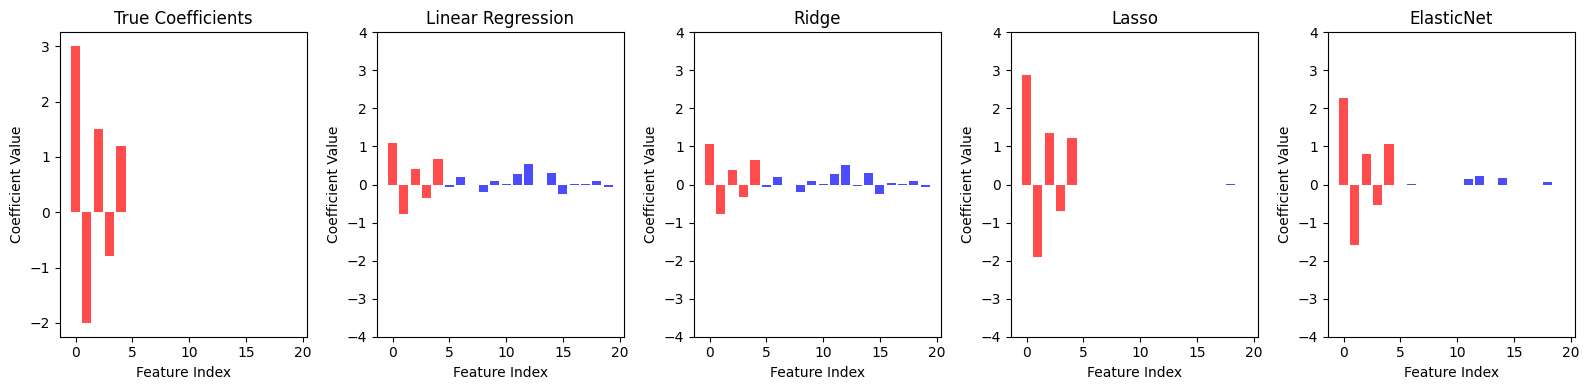

In [87]:
plt.figure(figsize=(16, 4))

models_viz = [
    ('True Coefficients', true_coef[:20]),  # Show first 20 for clarity
    ('Linear Regression', model_overfit.coef_[:20]),
    ('Ridge', ridge.coef_[:20]),
    ('Lasso', lasso.coef_[:20]),
    ('ElasticNet', elastic.coef_[:20])
]

for i, (name, coef) in enumerate(models_viz):
    plt.subplot(1, 5, i+1)
    colors = ['red' if j < 5 else 'blue' for j in range(20)]  # Red for true important features
    plt.bar(range(len(coef)), coef, color=colors, alpha=0.7)
    plt.title(name)
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    if i > 0:  # Limit y-axis for fitted models
        plt.ylim(-4, 4)

plt.tight_layout()
plt.show()

**Key Takeaway**:

- Ridge: Shrinks all coefficients, reduces overfitting, keeps all features
- Lasso: Sets coefficients to exactly zero, automatic feature selection
- ElasticNet: Combines Ridge and Lasso benefits, good for grouped features
- Alpha parameter: Higher values = more regularization = simpler models

## 7. Model Selection

In [88]:
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve

# Use a clean dataset for model selection
X_ms, y_ms = X_mixed, y_mixed  # Use our mixed features dataset
X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(X_ms, y_ms, test_size=0.2, random_state=42)

### Cross-validation to compare models

In [89]:
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0, max_iter=2000),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=2000)
}

cv_results = {}
print("5-Fold Cross-Validation Results:")
for name, model in models.items():
    scores = cross_val_score(model, X_train_ms, y_train_ms, cv=5, scoring='r2')
    cv_results[name] = scores
    print(f"{name:12}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

5-Fold Cross-Validation Results:
Linear      : 0.946 (+/- 0.013)
Ridge       : 0.946 (+/- 0.013)
Lasso       : 0.946 (+/- 0.013)
ElasticNet  : 0.894 (+/- 0.030)


### Hyperparameter tuning with GridSearchC

In [ ]:
# Grid search for Ridge
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_ms, y_train_ms)

# Grid search for Lasso  
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(max_iter=2000), lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train_ms, y_train_ms)

# Grid search for ElasticNet
elastic_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
elastic_grid = GridSearchCV(ElasticNet(max_iter=2000), elastic_params, cv=5, scoring='r2', n_jobs=-1)
elastic_grid.fit(X_train_ms, y_train_ms)

print(f"\nBest Hyperparameters:")
print(f"Ridge - Alpha: {ridge_grid.best_params_['alpha']}, CV Score: {ridge_grid.best_score_:.3f}")
print(f"Lasso - Alpha: {lasso_grid.best_params_['alpha']}, CV Score: {lasso_grid.best_score_:.3f}")
print(f"ElasticNet - Alpha: {elastic_grid.best_params_['alpha']}, L1 Ratio: {elastic_grid.best_params_['l1_ratio']}, CV Score: {elastic_grid.best_score_:.3f}")

### Validation curves to understand hyperparameter effects

In [ ]:
# Ridge validation curve
alphas = np.logspace(-3, 2, 20)
train_scores, val_scores = validation_curve(
    Ridge(), X_train_ms, y_train_ms,
    param_name='alpha', param_range=alphas,
    cv=5, scoring='r2', n_jobs=-1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
plt.semilogx(alphas, val_scores.mean(axis=1), 'o-', label='Validation Score', color='red')
plt.fill_between(alphas, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='blue')
plt.fill_between(alphas, val_scores.mean(axis=1) - val_scores.std(axis=1),
                 val_scores.mean(axis=1) + val_scores.std(axis=1), alpha=0.1, color='red')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression Validation Curve')
plt.legend()
plt.grid(True)

# Final model comparison on test set
final_models = {
    'Linear': LinearRegression(),
    'Best Ridge': Ridge(alpha=ridge_grid.best_params_['alpha']),
    'Best Lasso': Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=2000),
    'Best ElasticNet': ElasticNet(alpha=elastic_grid.best_params_['alpha'], 
                                  l1_ratio=elastic_grid.best_params_['l1_ratio'], max_iter=2000)
}

final_results = {}
for name, model in final_models.items():
    model.fit(X_train_ms, y_train_ms)
    y_pred = model.predict(X_test_ms)
    r2 = r2_score(y_test_ms, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_ms, y_pred))
    final_results[name] = {'R²': r2, 'RMSE': rmse}

results_df = pd.DataFrame(final_results).T
plt.subplot(1, 2, 2)
results_df['R²'].plot(kind='bar', color='skyblue')
plt.title('Final Model Comparison (Test Set)')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFinal Test Set Performance:")
print(results_df.round(3))

best_model_name = results_df['R²'].idxmax()
print(f"\nBest model: {best_model_name}")

**Key Takeaway**:

- Use cross-validation to get reliable performance estimates
- Grid search finds optimal hyperparameters automatically
- Validation curves help understand the bias-variance tradeoff
- Always test final model on holdout test set for unbiased evaluation

## 8. Model Diagnostics

In [ ]:
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use the best model for diagnostics
best_model = final_models[best_model_name]
y_pred_final = best_model.predict(X_test_ms)
residuals = y_test_ms - y_pred_final

### Statistical Tests and Diagnostic Plots

In [ ]:
def comprehensive_diagnostics(model, X_test, y_test, y_pred, feature_names=None):
    """Complete diagnostic analysis for linear regression"""
    
    residuals = y_test - y_pred
    standardized_residuals = residuals / np.std(residuals)
    
    # Create diagnostic plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Residuals vs Fitted
    axes[0, 0].scatter(y_pred, residuals, alpha=0.6)
    axes[0, 0].axhline(y=0, color='red', linestyle='--')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Q-Q Plot for normality
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot (Normality Check)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Scale-Location Plot
    sqrt_abs_residuals = np.sqrt(np.abs(standardized_residuals))
    axes[0, 2].scatter(y_pred, sqrt_abs_residuals, alpha=0.6)
    axes[0, 2].set_xlabel('Fitted Values')
    axes[0, 2].set_ylabel('√|Standardized Residuals|')
    axes[0, 2].set_title('Scale-Location Plot')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Histogram of residuals
    axes[1, 0].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Residuals')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Actual vs Predicted
    axes[1, 1].scatter(y_test, y_pred, alpha=0.6)
    perfect_line = np.linspace(y_test.min(), y_test.max(), 100)
    axes[1, 1].plot(perfect_line, perfect_line, 'red', linestyle='--', label='Perfect Prediction')
    axes[1, 1].set_xlabel('Actual Values')
    axes[1, 1].set_ylabel('Predicted Values')
    axes[1, 1].set_title('Actual vs Predicted')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Leverage vs Residuals (Cook's Distance)
    if hasattr(model, 'coef_') and X_test.shape[0] > X_test.shape[1]:
        try:
            # Calculate leverage (hat values)
            X_with_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])
            hat_matrix = X_with_intercept @ np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T
            leverage = np.diag(hat_matrix)
            
            # Calculate Cook's distance
            mse = np.mean(residuals**2)
            p = X_test.shape[1] + 1  # number of parameters
            cook_d = (residuals**2 / (p * mse)) * (leverage / (1 - leverage)**2)
            
            axes[1, 2].scatter(leverage, standardized_residuals, c=cook_d, 
                             cmap='viridis', alpha=0.6, s=50)
            axes[1, 2].axhline(y=0, color='red', linestyle='--')
            axes[1, 2].axhline(y=2, color='red', linestyle=':', alpha=0.7)
            axes[1, 2].axhline(y=-2, color='red', linestyle=':', alpha=0.7)
            axes[1, 2].set_xlabel('Leverage')
            axes[1, 2].set_ylabel('Standardized Residuals')
            axes[1, 2].set_title('Leverage vs Residuals (Color = Cook\'s Distance)')
            
            # Identify potential outliers
            outlier_threshold = 4 / len(y_test)
            high_cook = cook_d > outlier_threshold
            if np.any(high_cook):
                print(f"⚠️  {np.sum(high_cook)} observations with high Cook's distance (>{outlier_threshold:.4f})")
                
        except np.linalg.LinAlgError:
            axes[1, 2].text(0.5, 0.5, 'Cannot compute\nCook\'s distance\n(Singular matrix)', 
                           transform=axes[1, 2].transAxes, ha='center', va='center')
            axes[1, 2].set_title('Cook\'s Distance - Unavailable')
    else:
        axes[1, 2].text(0.5, 0.5, 'Cook\'s distance\nnot applicable', 
                       transform=axes[1, 2].transAxes, ha='center', va='center')
        axes[1, 2].set_title('Cook\'s Distance - Not Applicable')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests
    print("📊 DIAGNOSTIC RESULTS")
    print("=" * 50)
    
    # 1. Normality test (Shapiro-Wilk)
    if len(residuals) <= 5000:  # Shapiro-Wilk works best for smaller samples
        shapiro_stat, shapiro_p = stats.shapiro(residuals)
        print(f"Normality Test (Shapiro-Wilk):")
        print(f"  Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
        print(f"  Interpretation: {'✅ Residuals appear normal' if shapiro_p > 0.05 else '❌ Residuals may not be normal'}")
    
    # 2. Heteroscedasticity test (Breusch-Pagan)
    try:
        from statsmodels.stats.diagnostic import het_breuschpagan
        bp_lm, bp_p, bp_f, bp_f_p = het_breuschpagan(residuals, X_test)
        print(f"\nHomoscedasticity Test (Breusch-Pagan):")
        print(f"  LM Statistic: {bp_lm:.4f}, p-value: {bp_p:.4f}")
        print(f"  Interpretation: {'✅ Homoscedastic (constant variance)' if bp_p > 0.05 else '❌ Heteroscedastic (non-constant variance)'}")
    except ImportError:
        print(f"\nHomoscedasticity: Install statsmodels for Breusch-Pagan test")
    
    # 3. Model performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = np.mean(np.abs(residuals))
    
    print(f"\nModel Performance:")
    print(f"  R² Score: {r2:.4f} ({r2*100:.1f}% variance explained)")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    
    return {
        'residuals': residuals,
        'r2': r2,
        'rmse': rmse,
        'mae': mae
    }

# Run comprehensive diagnostics
diagnostic_results = comprehensive_diagnostics(
    best_model, X_test_ms, y_test_ms, y_pred_final, 
    feature_names=X_ms.columns
)

### Multicollinearity Check (VIF)

In [ ]:
def check_multicollinearity(X, feature_names=None, threshold=5.0):
    """Check for multicollinearity using Variance Inflation Factor"""
    
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = feature_names
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print(f"\n🔍 MULTICOLLINEARITY CHECK (VIF Analysis)")
    print("=" * 50)
    print(vif_data.round(2))
    
    high_vif = vif_data[vif_data['VIF'] > threshold]
    if len(high_vif) > 0:
        print(f"\n⚠️  Features with high VIF (>{threshold}):")
        for _, row in high_vif.iterrows():
            print(f"  {row['Feature']}: {row['VIF']:.2f}")
        print("  Consider removing these features or using regularization")
    else:
        print(f"\n✅ No multicollinearity issues detected (all VIF < {threshold})")
    
    return vif_data

# Check multicollinearity
vif_results = check_multicollinearity(X_test_ms, X_ms.columns)

### Feature Importance Analysis

In [ ]:
def analyze_feature_importance(model, feature_names, top_n=10):
    """Analyze and visualize feature importance"""
    
    if hasattr(model, 'coef_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': model.coef_,
            'abs_coefficient': np.abs(model.coef_)
        }).sort_values('abs_coefficient', ascending=False)
        
        print(f"\n📈 FEATURE IMPORTANCE ANALYSIS")
        print("=" * 50)
        print(f"Top {top_n} Most Important Features:")
        print(importance_df.head(top_n)[['feature', 'coefficient']].round(2))
        
        # Visualize
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        top_features = importance_df.head(top_n)
        colors = ['red' if coef < 0 else 'blue' for coef in top_features['coefficient']]
        plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Coefficient Value')
        plt.title(f'Top {top_n} Feature Coefficients')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.barh(range(len(top_features)), top_features['abs_coefficient'], color='green', alpha=0.7)
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Absolute Coefficient Value')
        plt.title(f'Top {top_n} Feature Importance (Magnitude)')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return importance_df
    else:
        print("Model does not have feature coefficients")
        return None

# Analyze feature importance
importance_results = analyze_feature_importance(best_model, X_ms.columns)

**Key Takeaway**: Diagnostic analysis is crucial for validating model assumptions:

- Residual plots: Check for patterns indicating model problems
- Q-Q plots: Verify normality assumption
- VIF analysis: Detect multicollinearity issues
- Cook's distance: Identify influential outliers
- Feature importance: Understand which variables drive predictions

## 9. Production Pipeline

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create a robust production pipeline
def create_production_pipeline(numeric_features, categorical_features, model_type='ridge', **model_params):
    """Create a complete ML pipeline for production use"""
    
    # Preprocessing steps
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # Combine preprocessing
    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    
    # Select model
    if model_type.lower() == 'ridge':
        model = Ridge(**model_params)
    elif model_type.lower() == 'lasso':
        model = Lasso(max_iter=2000, **model_params)
    elif model_type.lower() == 'elasticnet':
        model = ElasticNet(max_iter=2000, **model_params)
    else:
        model = LinearRegression()
    
    # Create full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    return pipeline

# Define feature types for our mixed dataset
numeric_features = ['size', 'age']
categorical_features = ['neighborhood', 'house_type']

# Create production pipeline with best hyperparameters
production_pipeline = create_production_pipeline(
    numeric_features=numeric_features,
    categorical_features=categorical_features,
    model_type='ridge',
    alpha=ridge_grid.best_params_['alpha']
)

# Train on original mixed data (before one-hot encoding)
X_prod = df_mixed.drop('price', axis=1)
y_prod = df_mixed['price']

X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(
    X_prod, y_prod, test_size=0.2, random_state=42)

production_pipeline.fit(X_train_prod, y_train_prod)

print("✅ Production pipeline trained successfully!")
print(f"Pipeline steps: {[step[0] for step in production_pipeline.steps]}")

✅ Production pipeline trained successfully!
Pipeline steps: ['preprocessor', 'model']


### Test Production Pipeline

In [97]:
# Test with new data (including edge cases)
new_data = pd.DataFrame({
    'size': [1200, 2500, np.nan, 800],  # Include missing value
    'age': [5, 25, 10, np.nan],         # Include missing value  
    'neighborhood': ['Downtown', 'Suburbs', 'Rural', 'Unknown'],  # Include unknown category
    'house_type': ['House', 'Condo', 'Apartment', 'Unknown']     # Include unknown category
})

print("New data for prediction:")
print(new_data)

# Pipeline handles all preprocessing automatically
predictions = production_pipeline.predict(new_data)

print(f"\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"House {i+1}: ${pred:,.0f}")

# Evaluate on test set
y_pred_prod = production_pipeline.predict(X_test_prod)
prod_r2 = r2_score(y_test_prod, y_pred_prod)
prod_rmse = np.sqrt(mean_squared_error(y_test_prod, y_pred_prod))

print(f"\nProduction Pipeline Performance:")
print(f"R² Score: {prod_r2:.3f}")
print(f"RMSE: ${prod_rmse:,.0f}")

New data for prediction:
     size   age neighborhood house_type
0  1200.0   5.0     Downtown      House
1  2500.0  25.0      Suburbs      Condo
2     NaN  10.0        Rural  Apartment
3   800.0   NaN      Unknown    Unknown

Predictions:
House 1: $206,105
House 2: $268,887
House 3: $190,268
House 4: $108,510

Production Pipeline Performance:
R² Score: 0.951
RMSE: $16,203


### Model Persistence and Deployment Functions

In [98]:
import joblib
import json
from datetime import datetime

def save_model_with_metadata(pipeline, model_info, filepath):
    """Save model with comprehensive metadata"""
    
    # Save the pipeline
    joblib.dump(pipeline, f"{filepath}.pkl")
    
    # Save metadata
    metadata = {
        'model_info': model_info,
        'saved_timestamp': datetime.now().isoformat(),
        'feature_names': {
            'numeric': numeric_features,
            'categorical': categorical_features
        },
        'preprocessing_steps': [step[0] for step in pipeline.steps],
        'model_type': type(pipeline.named_steps['model']).__name__,
        'performance_metrics': {
            'r2_score': float(prod_r2),
            'rmse': float(prod_rmse)
        }
    }
    
    with open(f"{filepath}_metadata.json", 'w') as f:
        json.dump(metadata, f, indent=2)
    
    print(f"✅ Model and metadata saved to {filepath}")

def production_predict(model_path, new_data):
    """Production-ready prediction function with error handling"""
    
    try:
        # Load model
        pipeline = joblib.load(f"{model_path}.pkl")
        
        # Load metadata for validation
        with open(f"{model_path}_metadata.json", 'r') as f:
            metadata = json.load(f)
        
        # Validate input
        expected_features = metadata['feature_names']['numeric'] + metadata['feature_names']['categorical']
        if not all(col in new_data.columns for col in expected_features):
            missing_cols = [col for col in expected_features if col not in new_data.columns]
            raise ValueError(f"Missing required columns: {missing_cols}")
        
        # Make predictions
        predictions = pipeline.predict(new_data[expected_features])
        
        return {
            'predictions': predictions.tolist(),
            'status': 'success',
            'model_version': metadata['saved_timestamp'],
            'n_samples': len(predictions)
        }
        
    except Exception as e:
        return {
            'predictions': None,
            'status': 'error',
            'error_message': str(e),
            'n_samples': 0
        }

# Save the production model
model_info = {
    'description': 'House price prediction model',
    'version': '1.0',
    'features': numeric_features + categorical_features,
    'target': 'price'
}

save_model_with_metadata(production_pipeline, model_info, 'house_price_model')

# Test the production prediction function
result = production_predict('house_price_model', new_data)
print(f"\nProduction prediction result:")
print(json.dumps(result, indent=2))

✅ Model and metadata saved to house_price_model

Production prediction result:
{
  "predictions": [
    206105.1822801613,
    268887.02971582854,
    190268.40955819204,
    108510.46448116467
  ],
  "status": "success",
  "model_version": "2025-06-11T12:41:16.506827",
  "n_samples": 4
}


### Model Monitoring Setup

In [99]:
def create_monitoring_report(y_true, y_pred, model_name="Model"):
    """Create a monitoring report for production model"""
    
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Calculate prediction intervals
    residuals = y_true - y_pred
    residual_std = np.std(residuals)
    
    # Detect potential issues
    issues = []
    if r2 < 0.5:
        issues.append("Low R² score - model may be underperforming")
    if np.abs(np.mean(residuals)) > residual_std * 0.1:
        issues.append("Bias detected - predictions systematically off")
    if len(np.where(np.abs(residuals) > 3 * residual_std)[0]) > len(y_true) * 0.05:
        issues.append("High number of outliers - data may have changed")
    
    report = {
        'model_name': model_name,
        'timestamp': datetime.now().isoformat(),
        'n_predictions': len(y_true),
        'performance_metrics': {
            'r2_score': float(r2),
            'rmse': float(rmse),
            'mae': float(mae),
            'mean_bias': float(np.mean(residuals))
        },
        'data_quality': {
            'outliers_detected': int(len(np.where(np.abs(residuals) > 3 * residual_std)[0])),
            'outlier_percentage': float(len(np.where(np.abs(residuals) > 3 * residual_std)[0]) / len(y_true) * 100)
        },
        'alerts': issues,
        'status': 'healthy' if len(issues) == 0 else 'attention_needed'
    }
    
    return report

# Create monitoring report
monitoring_report = create_monitoring_report(y_test_prod, y_pred_prod, "House Price Model v1.0")
print(f"\n📊 MONITORING REPORT")
print("=" * 50)
print(json.dumps(monitoring_report, indent=2))


📊 MONITORING REPORT
{
  "model_name": "House Price Model v1.0",
  "timestamp": "2025-06-11T12:41:35.416517",
  "n_predictions": 200,
  "performance_metrics": {
    "r2_score": 0.9505205071596864,
    "rmse": 16202.681740603262,
    "mae": 12692.308682298584,
    "mean_bias": -307.72249651690095
  },
  "data_quality": {
    "outliers_detected": 0,
    "outlier_percentage": 0.0
  },
  "alerts": [],
  "status": "healthy"
}


**Key Takeaway**:

- Pipelines ensure consistency between training and production
- Handle edge cases like missing values and unknown categories
- Save comprehensive metadata for model versioning and monitoring
- Implement error handling for robust production deployment
- Set up monitoring to detect model degradation over time

## Summary: The Complete ML Workflow

In [100]:
def ml_workflow_summary():
    """
    Complete ML workflow from data to production - key principles
    """
    
    workflow_steps = {
        "1. Core Workflow": "fit() → predict() → evaluate() - Always the foundation",
        "2. Data Exploration": "Understand your data before modeling",
        "3. Data Cleaning": "Handle missing values, outliers, data quality issues", 
        "4. Preprocessing": "Scale features, encode categories consistently",
        "5. Feature Engineering": "Create polynomial terms, interactions, domain features",
        "6. Model Selection": "Try different algorithms, tune hyperparameters",
        "7. Regularization": "Control overfitting with Ridge/Lasso/ElasticNet",
        "8. Diagnostics": "Validate assumptions, check residuals, detect issues",
        "9. Production Pipeline": "Robust, monitored, version-controlled deployment"
    }
    
    print("🎯 COMPLETE MACHINE LEARNING WORKFLOW")
    print("=" * 60)
    for step, description in workflow_steps.items():
        print(f"{step}: {description}")
    
    print("\n💡 Key Success Factors:")
    print("✅ Start simple, add complexity gradually")
    print("✅ Always measure the impact of each change") 
    print("✅ Validate assumptions with diagnostic plots")
    print("✅ Build robust pipelines for production")
    print("✅ Monitor model performance over time")
    
    print(f"\n🔑 Remember: fit() → predict() → evaluate() is the core!")
    print(f"   Everything else supports these three essential steps.")

ml_workflow_summary()

🎯 COMPLETE MACHINE LEARNING WORKFLOW
1. Core Workflow: fit() → predict() → evaluate() - Always the foundation
2. Data Exploration: Understand your data before modeling
3. Data Cleaning: Handle missing values, outliers, data quality issues
4. Preprocessing: Scale features, encode categories consistently
5. Feature Engineering: Create polynomial terms, interactions, domain features
6. Model Selection: Try different algorithms, tune hyperparameters
7. Regularization: Control overfitting with Ridge/Lasso/ElasticNet
8. Diagnostics: Validate assumptions, check residuals, detect issues
9. Production Pipeline: Robust, monitored, version-controlled deployment

💡 Key Success Factors:
✅ Start simple, add complexity gradually
✅ Always measure the impact of each change
✅ Validate assumptions with diagnostic plots
✅ Build robust pipelines for production
✅ Monitor model performance over time

🔑 Remember: fit() → predict() → evaluate() is the core!
   Everything else supports these three essential ste